# SBB Rohdaten-Analyse

In [5]:
%load_ext autoreload
%autoreload

import pandas as pd
import pandas_profiling
import qgrid

from pa_lib.file import data_files, load_bin, load_pickle
from pa_lib.data import desc_col

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_files('*sbb*')

,size,mtime
name,,
sbb.feather,6.0 MB,02.07.19 10:43:39
sbb_info.feather,0 B,02.07.19 10:19:51
sbb_info.pkl,70.5 KB,02.07.19 10:43:39
sbbnutz_2014_1_5_final.sav,5.5 MB,12.05.14 14:51:42
sbbnutz_columns_2014.xlsx,16.9 KB,02.07.19 10:43:46
sbbnutz_data_2014.xlsx,1.6 MB,02.07.19 10:43:46


In [6]:
sbb = load_bin('sbb.feather')
sbb_info = load_pickle('sbb_info.pkl')

2019-07-02 11:56:51 [INFO] Reading from file C:\Users\kpf\data\sbb.feather
C:\ProgramData\Anaconda3\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels
2019-07-02 11:56:51 [INFO] Finished loading binary file in 0.01s (0.0s CPU)
2019-07-02 11:56:51 [INFO] Reading from file C:\Users\kpf\data\sbb_info.pkl
2019-07-02 11:56:51 [INFO] Finished loading pickle file in 0.0s (0.03s CPU)


## Umfragedaten: Metadaten (Spaltenbeschreibung)

In [11]:
qgrid.show_grid(sbb_info)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Umfragedaten: Rohdaten
Erste 20 Records, transponiert

In [12]:
qgrid.show_grid(sbb.head(20).T)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Univariate Auswertung

In [ ]:
pandas_profiling.ProfileReport(sbb).to_file('sbb.profiles.html')

In [13]:
qgrid.show_grid(desc_col(sbb, det=True))

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Multivariate Auswertung

##### Normalize values

In [14]:
def norm(df):
    """Normalize dataframe to range [0, 1] by column"""
    num = df.select_dtypes('number')
    scaled = (num - num.min()) / (num.max() - num.min()) # min() and max() work column-wise by default
    cleaned = scaled.dropna(axis='columns', how='all')   # zero-only columns will scale to NaN
    return cleaned

##### Nonparametric correlations

In [15]:
sbb_corr = norm(sbb).corr(method='kendall')

##### Plot heatmap

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set(rc={'figure.dpi': 90, 'figure.figsize': [20, 20]})

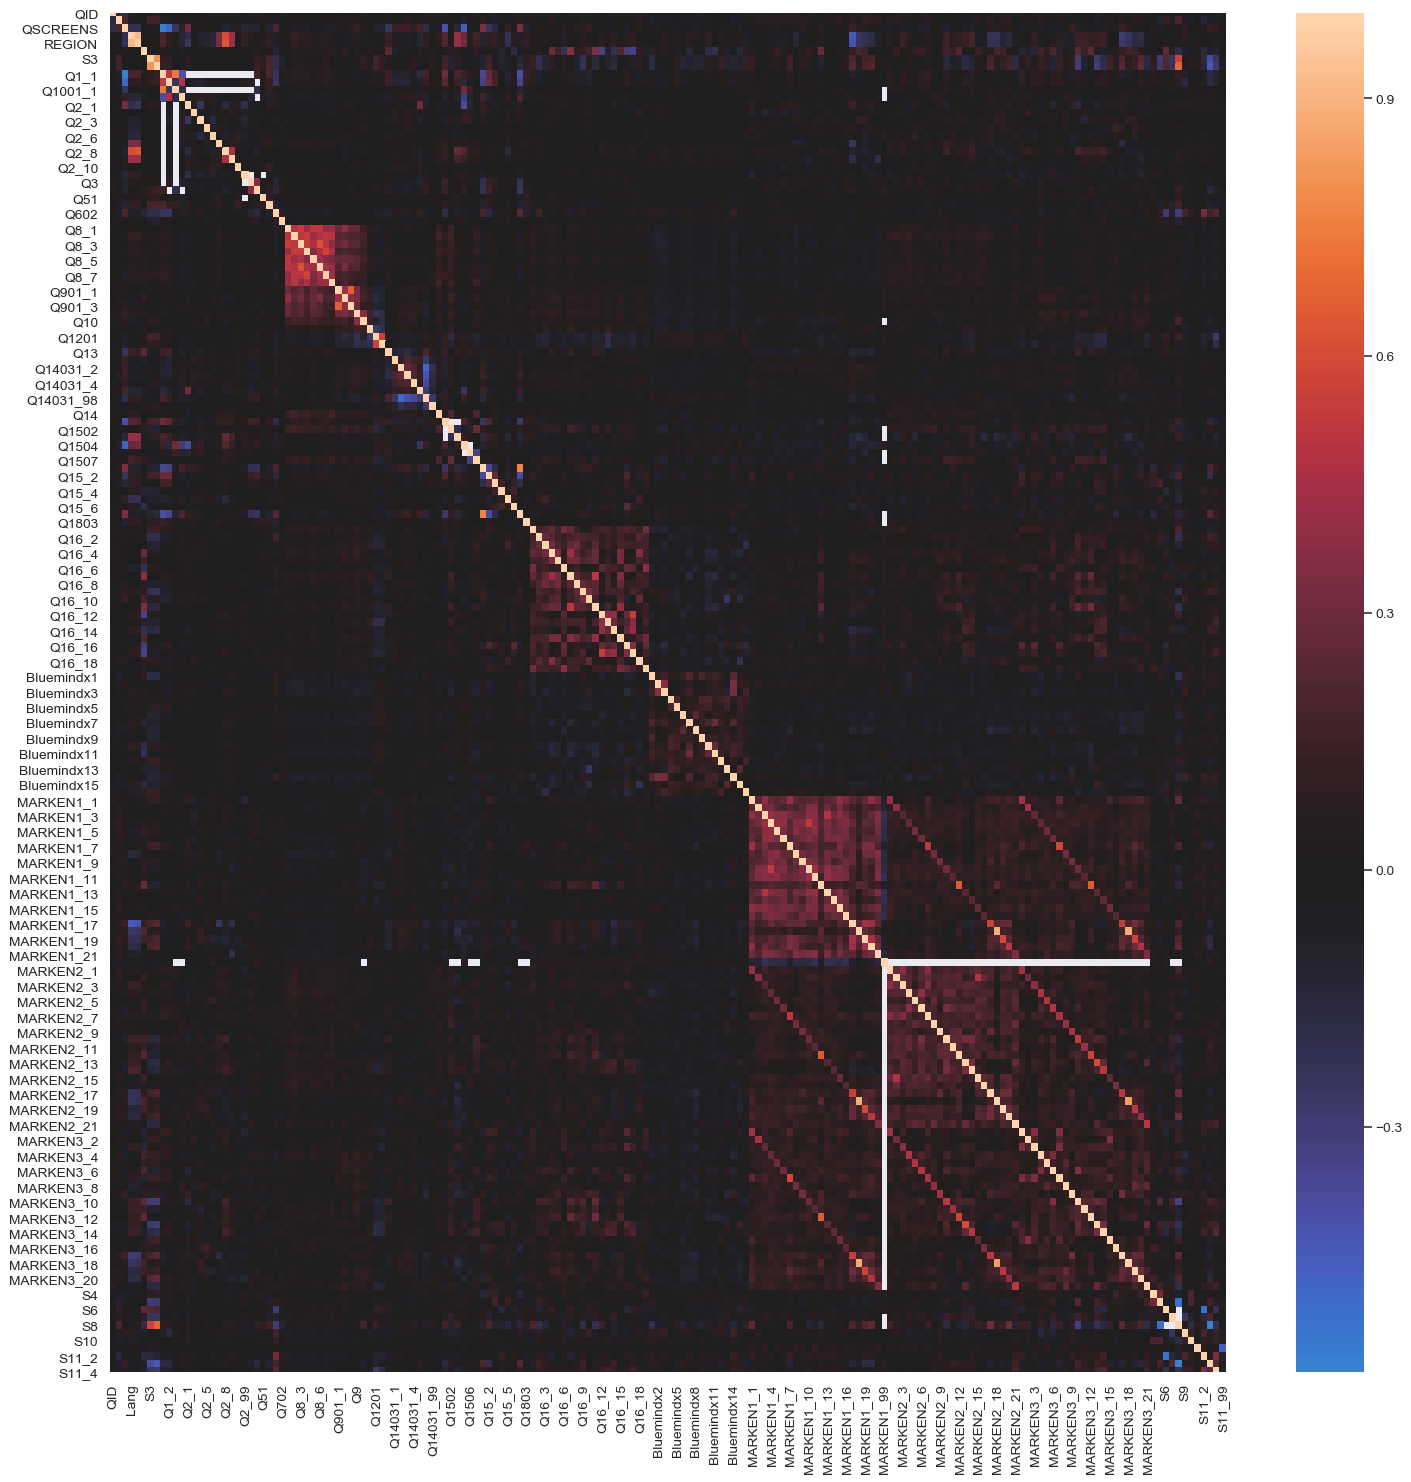

In [19]:
sns.heatmap(sbb_corr, center=0);